In [1]:
import os
os.chdir('../../notebooks')

In [2]:
import pandas as pd
import numpy as np
import protfasta

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2
import pandas as pd
import numpy as np
%aimport AD_comparison_tools
%aimport AD_predictor_tools
%aimport ADpred_LambertTFs_helper
import protfasta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, auc

from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.lines import Line2D

sns.set_theme(rc={'figure.figsize':(6,4), 'figure.dpi' : 300})
sns.set_style("white")

In [5]:
yeast_TFs = pd.read_csv("../output/yeast_TF_seqs.csv")
yeast_TFs

,Unnamed: 0,id,seq
0,0,sp|O14467|MBF1_YEAST Multiprotein-bridging fac...,MSDWDTNTIIGSRARAGGSGPRANVARSQGQINAARRQGLVVSVDK...
1,1,sp|O93958|MATA2_YARLL Mating-type protein A2 O...,MENTILHIHSFQLPQTEQPYPEAMLFDRDTSDSRTVLTQKPNGLEI...
2,2,sp|P03069|GCN4_YEAST General control transcrip...,MSEYQPSLFALNPMGFSPLDGSKSTNENVSASTSTAKPMVGQLIFD...
3,3,sp|P04386|GAL4_YEAST Regulatory protein GAL4 O...,MKLLSSIEQACDICRLKKLKCSKEKPKCAKCLKNNWECRYSPKTKR...
4,4,sp|P04387|GAL80_YEAST Galactose/lactose metabo...,MDYNKRSSVSTVPNAAPIRVGFVGLNAAKGWAIKTHYPAILQLSSQ...
...,...,...,...
242,242,sp|Q707Y3|MATA1_YARLL Mating-type protein A1 O...,MPSRTPTDIWRCQRLILAARKGETTCQALHEQSIEISSSLKWFEEI...
243,243,sp|Q707Y6|MATA1_PICAN Mating-type protein A1 O...,MQFTILNEPSLDSQRREGDLASENYVFGDIRKEGVRILEDSLRSER...
244,244,sp|Q708A1|MATA1_NAKDE Mating-type protein A1 O...,MNVQEIHNIREACITILSGTKHNSVLFEPCDKFDEVINSLDIDPDS...
245,245,sp|Q9HG12|MATA1_KLULA Mating-type protein A1 O...,MCDNDMADIQSKLSSFCEEIRALALKEGYNLEGDKSPSSKPYFMSW...


In [6]:
yeast_TFs = yeast_TFs.rename(columns = {"id" : "uniprotID", "seq" : "ProteinSeq"})
yeast_TFs

,Unnamed: 0,uniprotID,ProteinSeq
0,0,sp|O14467|MBF1_YEAST Multiprotein-bridging fac...,MSDWDTNTIIGSRARAGGSGPRANVARSQGQINAARRQGLVVSVDK...
1,1,sp|O93958|MATA2_YARLL Mating-type protein A2 O...,MENTILHIHSFQLPQTEQPYPEAMLFDRDTSDSRTVLTQKPNGLEI...
2,2,sp|P03069|GCN4_YEAST General control transcrip...,MSEYQPSLFALNPMGFSPLDGSKSTNENVSASTSTAKPMVGQLIFD...
3,3,sp|P04386|GAL4_YEAST Regulatory protein GAL4 O...,MKLLSSIEQACDICRLKKLKCSKEKPKCAKCLKNNWECRYSPKTKR...
4,4,sp|P04387|GAL80_YEAST Galactose/lactose metabo...,MDYNKRSSVSTVPNAAPIRVGFVGLNAAKGWAIKTHYPAILQLSSQ...
...,...,...,...
242,242,sp|Q707Y3|MATA1_YARLL Mating-type protein A1 O...,MPSRTPTDIWRCQRLILAARKGETTCQALHEQSIEISSSLKWFEEI...
243,243,sp|Q707Y6|MATA1_PICAN Mating-type protein A1 O...,MQFTILNEPSLDSQRREGDLASENYVFGDIRKEGVRILEDSLRSER...
244,244,sp|Q708A1|MATA1_NAKDE Mating-type protein A1 O...,MNVQEIHNIREACITILSGTKHNSVLFEPCDKFDEVINSLDIDPDS...
245,245,sp|Q9HG12|MATA1_KLULA Mating-type protein A1 O...,MCDNDMADIQSKLSSFCEEIRALALKEGYNLEGDKSPSSKPYFMSW...


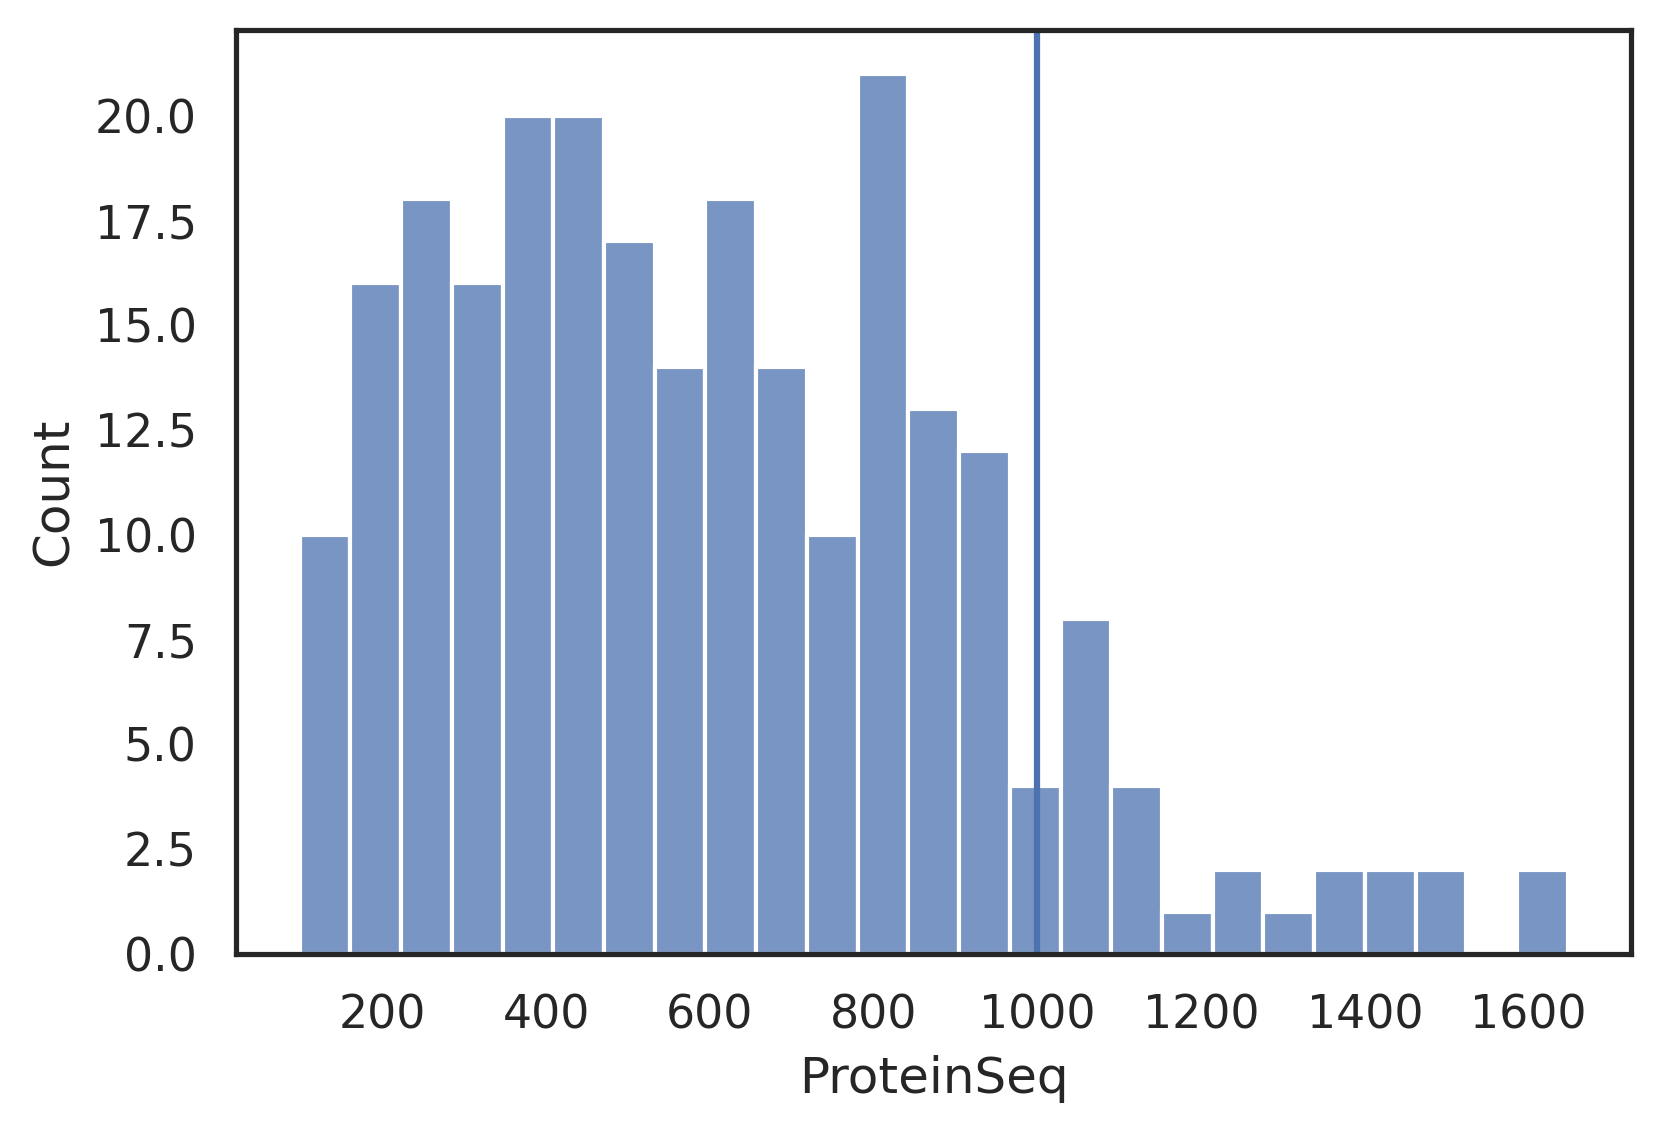

In [7]:
sns.histplot(yeast_TFs["ProteinSeq"].str.len(), bins = 25)
plt.axvline(1000)

In [8]:
max(yeast_TFs["ProteinSeq"].str.len())

1648

In [9]:
tiled_yeast_TFs = AD_predictor_tools.makeTilingDF("../data/yeast_TFs.fasta", window_size=1000, window_spacing=1000-15)
tiled_yeast_TFs

Using existing Tiling DF at ../data/TilingDFs/yeast_TFs_size_1000_space_985_AAs_W,F,Y,M,L,Q.csv


,ProteinWindowSeq,GeneName,StartPosition,EndPosition,W,F,Y,M,L,Q,K,R,D,E,Charge
0,MSDWDTNTIIGSRARAGGSGPRANVARSQGQINAARRQGLVVSVDK...,sp|O14467|MBF1_YEAST Multiprotein-bridging fac...,0,151,1,0,2,2,9,7,16,15,10,5,16
1,MENTILHIHSFQLPQTEQPYPEAMLFDRDTSDSRTVLTQKPNGLEI...,sp|O93958|MATA2_YARLL Mating-type protein A2 O...,0,291,2,17,12,7,22,15,19,16,20,12,3
2,MSEYQPSLFALNPMGFSPLDGSKSTNENVSASTSTAKPMVGQLIFD...,sp|P03069|GCN4_YEAST General control transcrip...,0,281,1,11,4,5,27,8,23,13,22,24,-10
3,MKLLSSIEQACDICRLKKLKCSKEKPKCAKCLKNNWECRYSPKTKR...,sp|P04386|GAL4_YEAST Regulatory protein GAL4 O...,0,881,12,38,27,19,95,46,47,36,45,40,-2
4,MDYNKRSSVSTVPNAAPIRVGFVGLNAAKGWAIKTHYPAILQLSSQ...,sp|P04387|GAL80_YEAST Galactose/lactose metabo...,0,435,3,20,22,10,40,18,24,15,17,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,MPSRTPTDIWRCQRLILAARKGETTCQALHEQSIEISSSLKWFEEI...,sp|Q707Y3|MATA1_YARLL Mating-type protein A1 O...,0,176,5,8,5,3,12,7,6,15,7,14,0
267,MQFTILNEPSLDSQRREGDLASENYVFGDIRKEGVRILEDSLRSER...,sp|Q707Y6|MATA1_PICAN Mating-type protein A1 O...,0,181,2,7,4,3,15,4,16,20,10,23,3
268,MNVQEIHNIREACITILSGTKHNSVLFEPCDKFDEVINSLDIDPDS...,sp|Q708A1|MATA1_NAKDE Mating-type protein A1 O...,0,122,1,4,2,3,10,4,15,9,7,9,8
269,MCDNDMADIQSKLSSFCEEIRALALKEGYNLEGDKSPSSKPYFMSW...,sp|Q9HG12|MATA1_KLULA Mating-type protein A1 O...,0,228,2,11,9,5,16,11,23,10,16,17,0


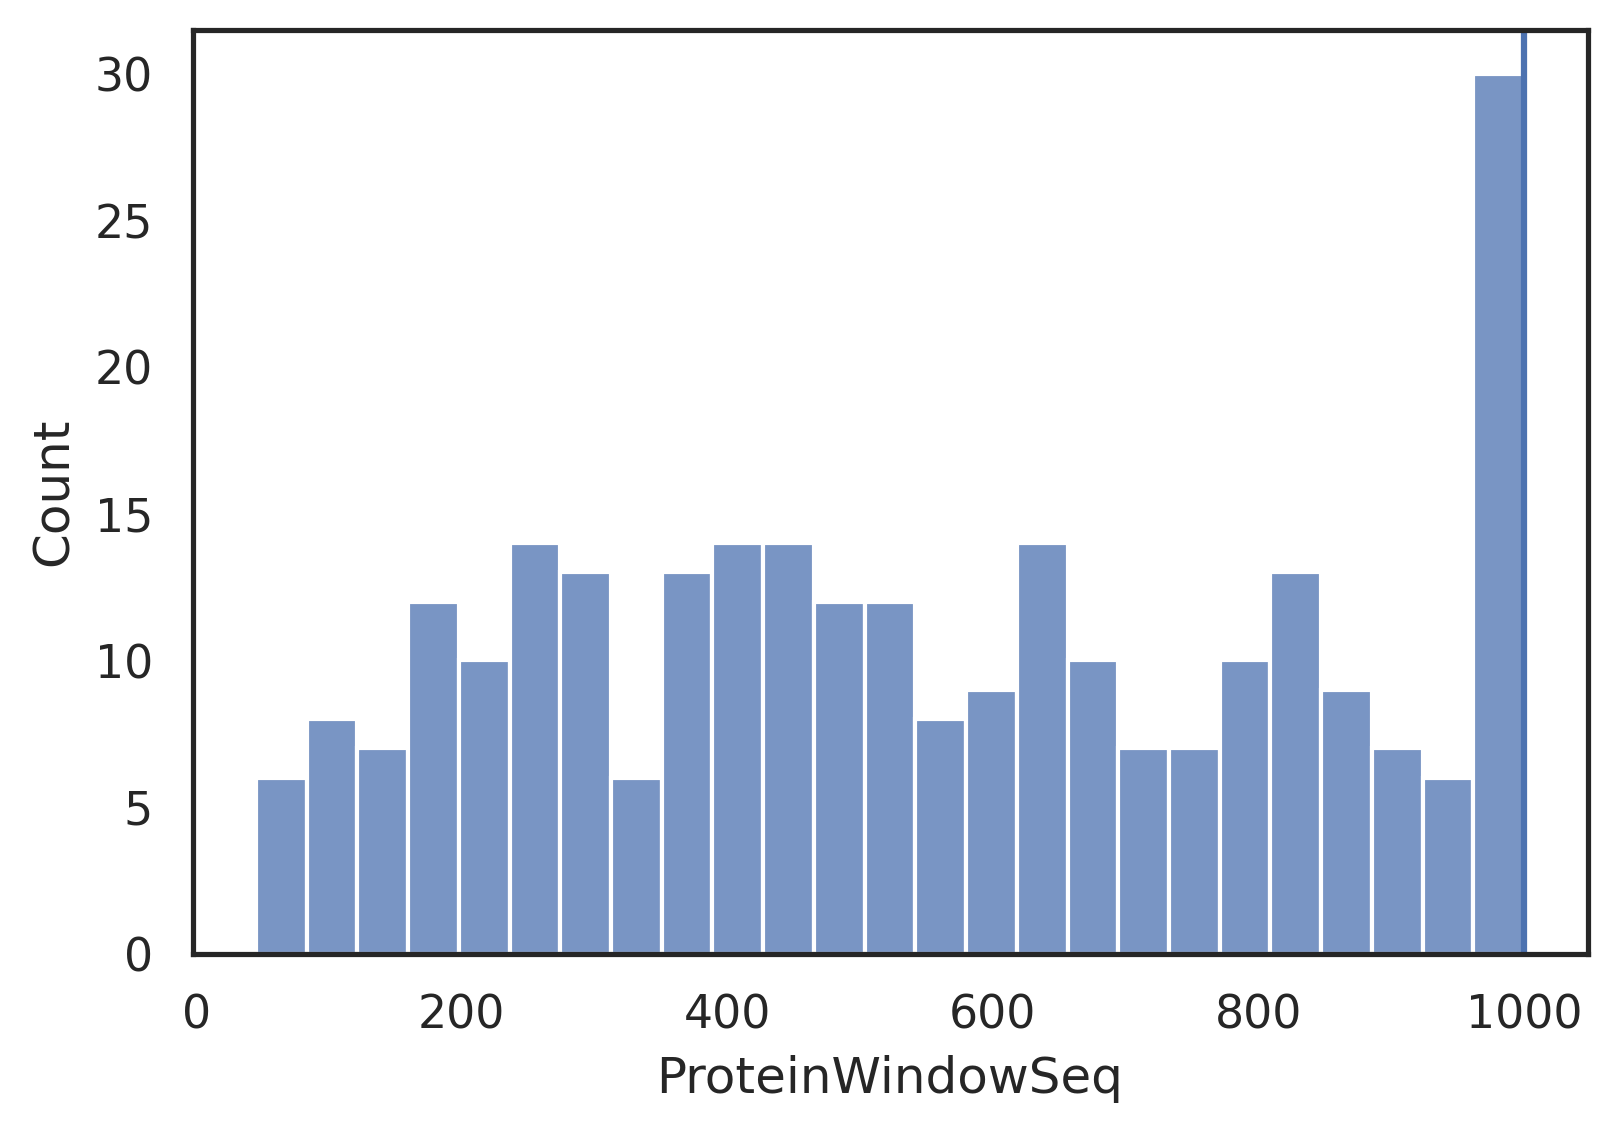

In [10]:
sns.histplot(tiled_yeast_TFs["ProteinWindowSeq"].str.len(), bins = 25)
plt.axvline(1000)

In [11]:
tiled_yeast_TFs.to_csv("../data/tiled_yeast_TFs_for_adpred.csv")


In [14]:
# To make sure script works
tiled_yeast_TFs.head(2).to_csv("../data/test_tiled_yeast_TFs_for_adpred.csv")
